In [73]:
import numpy as np
from PIL import Image

from siamese import Siamese

if __name__ == "__main__":
    model = Siamese()
    # /home/hechunjiang/gradio/样品2 SONY 43吋
    # /home/hechunjiang/gradio/样品3 亚马逊 43吋
    image_1 = Image.open("/home/hechunjiang/gradio/样品1 LG 65UF8580/华为P50手机采集图像/样品1采集图像/2.jpg")
    image_2 = Image.open("/home/hechunjiang/gradio/样品1 LG 65UF8580/华为P50手机采集图像/监视器采集图像/2.jpg")
    # image_1 = Image.open("/data/hechunjiang/KADID-10k/kadid10k/images/I01_01_05.png")
    # image_2 = Image.open("/data/hechunjiang/KADID-10k/kadid10k/images/I01.png")
    # image_1 = Image.open("/home/hechunjiang/gradio/GeoFormer/croped_result/finetune_dst/2/cropped_image_28.png")
    # image_2 = Image.open("/home/hechunjiang/gradio/GeoFormer/croped_result/finetune_ref/2/cropped_image_28.png")
    probability = model.detect_image(image_1,image_2)
    print(probability)

Loading weights into state dict...
/home/hechunjiang/gradio/Siamese-pytorch/model_data/best_epoch_weights_kadid10k.pth model loaded.
Configurations:
----------------------------------------------------------------------
|                     keys |                                   values|
----------------------------------------------------------------------
|               model_path | /home/hechunjiang/gradio/Siamese-pytorch/model_data/best_epoch_weights_kadid10k.pth|
|              input_shape |                               [256, 256]|
|          letterbox_image |                                    False|
|                     cuda |                                     True|
----------------------------------------------------------------------
tensor([0.1246], device='cuda:0')


: 

In [49]:
import numpy as np
from PIL import Image

from siamese import Siamese
import os

scores = [[] for _ in range(22)]

if __name__ == "__main__":
    model = Siamese()
    img_list_1 = []
    img_list_2 = []
    for i in range(1, 22):
        img_list_1 = os.listdir(
            f"/home/hechunjiang/gradio/GeoFormer/croped_result/finetune_dst/{i}/")
        img_list_2 = os.listdir(
            f"/home/hechunjiang/gradio/GeoFormer/croped_result/finetune_ref/{i}/")

        img_list_1.sort(key=lambda x: int(x.split("_")[-1].split(".")[0]))
        img_list_2.sort(key=lambda x: int(x.split("_")[-1].split(".")[0]))
        for path1, path2 in zip(img_list_1, img_list_2):
            image_1 = Image.open(
                f"/home/hechunjiang/gradio/GeoFormer/croped_result/finetune_dst/{i}/{path1}")
            image_2 = Image.open(
                f"/home/hechunjiang/gradio/GeoFormer/croped_result/finetune_ref/{i}/{path2}")
            scores[i].append(model.detect_image(image_1, image_2).cpu().numpy())
        score = sum(scores[i]) / len(scores[i])
        print(f"image {i} score = {score}")

Loading weights into state dict...


/home/hechunjiang/gradio/Siamese-pytorch/siamese.py:65: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(self.model_path, map_location=device))

/home/hechunjiang/gradio/Siamese-pytorch/model_data/best_epoch_weights_kadid10k.pth model loaded.
Configurations:
----------------------------------------------------------------------
|                     keys |                                   values|
----------------------------------------------------------------------
|               model_path | /home/hechunjiang/gradio/Siamese-pytorch/model_data/best_epoch_weights_kadid10k.pth|
|              input_shape |                               [256, 256]|
|          letterbox_image |                                    False|
|                     cuda |                                     True|
----------------------------------------------------------------------
image 1 score = [0.12125875]
image 2 score = [-0.04923417]
image 3 score = [-0.4031631]
image 4 score = [0.04928949]
image 5 score = [0.13532683]
image 6 score = [0.16486607]
image 7 score = [-0.06446891]
image 8 score = [-0.06683374]
image 9 score = [0.11771034]
image 10 sc

In [60]:
s = [[] for _ in range(22)]
for i in range(22):
    for x in scores[i]:
        s[i].append(x[0])

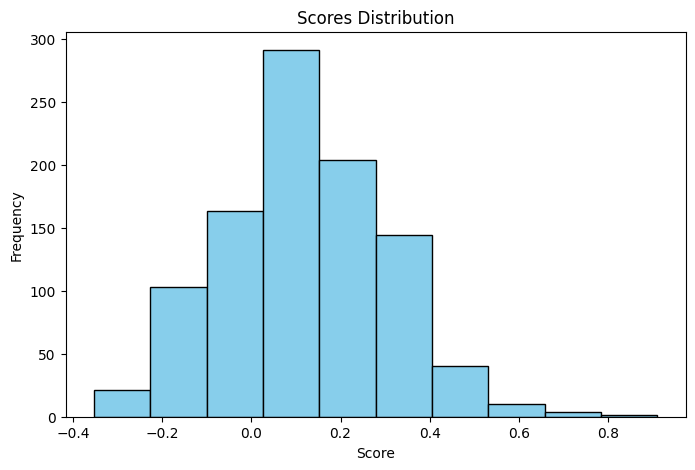

In [71]:
import matplotlib.pyplot as plt
img_idx = 1
# 绘制直方图
plt.figure(figsize=(8, 5))
plt.hist(s[img_idx], bins=10, color='skyblue', edgecolor='black')
plt.title('Scores Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()
